## 基本思想

&emsp;&emsp;线性模型形式简单，易于建模，但却蕴含着机器学习中的一些重要的基本思想：

$$
f(x) = w_{1}x_{1} + w_{2}x_{2} + \cdots + w_{d}x_{d} + b
$$

&emsp;&emsp;目的就是求出$w$这个参数。

## 线性回归

### 一元线性回归

&emsp;&emsp;线性回归是使用线性模型拟合数据的一种方法。

&emsp;&emsp;**最小二乘法**：`Least Square Method`最小方差法。原理是：当预测值和实际值距离的平方和最小时，就选定模型中的两个参数($w$和$b$)。

$$
\min_{\hat{b}} \sum_{i=1}^{n}(y_{m}-y_{i})^{2}
$$

&emsp;&emsp;因此这个问题就转变为了，我们需要找一组参数$w$和$b$，能够使得这些样本在当前模型下的均方误差最小，用数学形式表达如下所示：

$$
(w^{*},b^{*})=argmin_{w,b} \sum_{i=1}^{m}(y_{i}-wx_{i}-b)^{2}
$$

&emsp;&emsp;$w^{*},b^{*}$表示$w$和$b$的解。

&emsp;&emsp;由于$E_{(w,b)}$是关于$w$和$b$的凸函数，所以对其求偏导数，令其偏导数等于`0`，所求出来的解即为**最优解**。其偏导数求解如下所示：

$$
\frac{\partial E_{(w,b)}}{\partial w} = 2(w\sum_{i=1}^{m}x_{i}^{2}-\sum_{i=1}^{m}(y_{i}-b)x_{i})
$$

$$
\frac{\partial E_{(w,b)}}{\partial b} =  2(mb - \sum_{i=1}^{m}(y_{i}-wx_{i}))
$$

&emsp;&emsp;再令其偏导数为`0`，可得到$w$和$b$最优解的**闭式(`closed-from`)解**：

$$
w=\frac{\sum_{i=1}^{m}y_{i}(x_{i}-\overline{x})}{\sum_{i=1}^{m}x_{i}^{2}-\frac{1}{m}(\sum_{i=1}^{m}x_{i})^{2}}
$$

&emsp;&emsp;其中$\overline{x}=\frac{1}{m}\sum_{i=1}^{m}x_{i}$为$x$的均值。

$$
b = \frac{1}{m}\sum_{i=1}^{m}(y_{i}-wx_{i})
$$

&emsp;&emsp;至此，求解完毕。

### 多元线性回归

&emsp;&emsp;在一元回归问题中，样本只有一个属性。假设样本具有$n$个属性，此时期望找到一组模型参数$w$和$b$，使得$f(x_{i})=w^{T}x_{i}+b$，使得函数输出$f(x_{i})$与真实标签$y_{i}$越接近越好。我们将这类问题称为**多元线性回归**问题(`multivariate linear regression`)，或者叫做**多变量线性回归**问题。

&emsp;&emsp;我们把$w$和$b$组合称为一个向量的形式$\hat{w}=(w;b)$。与之对应，样本集可表示为一个$m \times (d+1)$大小的矩阵$X$。那么每一行都对应一个样本。每一行的前$d$个元素都表示为当前这个样本的$d$个属性值。最后这个元素恒为1，是方便与参数$\hat{w}$中的$b$相乘，形成偏置项。样本输入的数学表达形式可表示为如下形式：

$$
X=\left(\begin{array}{cccc}
{x_{11}} & {x_{12}} & {\cdots} & {x_{1d}} & {1}\\
{x_{21}} & {x_{22}} & {\cdots} & {x_{2d}} & {1}\\
{\vdots} & {\vdots} & {\ddots} & {\vdots} & {\vdots} \\
{x_{m1}} & {x_{m2}} & {\cdots} & {x_{md}}& {1}
\end{array}\right)=
\left(\begin{array}{cccc}
{x_{1}^{T}} & {1}  \\
{x_{2}^{T}} & {1}  \\
{\vdots} & {\vdots}  \\
{x_{m}^{T}} & {1} 
\end{array}\right)
$$

&emsp;&emsp;将标签以同样的方式写成向量的形式有$y=(y_{1};y_{2};\cdots;y_{m})$，令均方误差最小化，求其最优解：

$$
\hat{w}^{*}=argmin_{\hat{w}}(y-X\hat{w})^{T}(y-X\hat{w})
$$

&emsp;&emsp;令$E_{\hat{w}}=(y-X\hat{w})^{T}(y-X\hat{w})$，对$\hat{w}$求偏导得到如下方程：

$$
\frac{\partial E_{\hat{w}}}{\partial \hat{w}}=2X^{T}(X\hat{w}-y)
$$

$X^{T}X$为**满秩矩阵**(`full-rank matrix`)或**正定矩阵**(`positive definite matrix`)时，可求出：

$$
\hat{w}^{*}=(X^{T}X)^{-1}X^{T}y
$$

&emsp;&emsp;令$\hat{x_{i}}=(x_{i};1)$，则最终的线性回归模型可表示为：

$$
f(\hat{x_{i}})=\hat{x}_{i}(X^{T}X)^{-1}X^{T}y
$$

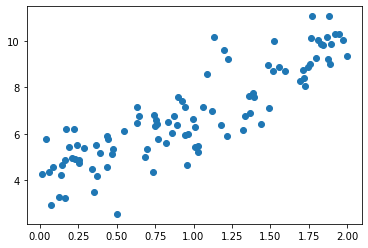

In [20]:
# 代码严重一下上述公示
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1) + 4

plt.scatter(X, y)
plt.show()

In [22]:
# 拼接X和b。
X_b = np.c_[X, np.ones((100, 1))]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[2.95179021]
 [3.93134323]]


### 对数线性回归

&emsp;&emsp;对数线性回归其实是线性回归上的一种广义推广。将样本标签$y$的对数模型作为线性模型逼近的目标，即：

$$
lny=w^{T}x+b
$$

&emsp;&emsp;这就是**对数线性回归**(`log-linear regression`)，它实际上是在试图让$e^{w^{T}x+b}$逼近$y$。上式形式上是线性回归，但实际上是在求**输入空间到输出空间的非线性函数映射**。

### 广义线性模型




&emsp;&emsp;考虑更一般的情况，考虑单调可微函数$g(·)$，令：

$$
y=g^{-1}(w^{T}x+b)
$$

&emsp;&emsp;这样得到的模型称为**广义线性模型**(`generalized linear model`)。我们把函数$g(·)$称为**联系函数**。广义线性模型的参数估计通常通过加权最小二乘法或极大似然法进行。

### 对数几率回归(逻辑回归)

&emsp;&emsp;普通的线性回归其实是映射到一条线上，我们也可以将其做成一个分类问题。只需要用一个单调可微的关系函数将分类任务的标记$y$做一个转换就可以了$y=\{0, 1\}$。

1. 这个转换的函数可以是一个单位阶跃函数:

$$
y=\left\{\begin{array}{cc}
0, & z<0 \\
0.5, & z=0 \\
1, & z>0
\end{array}\right.
$$

&emsp;&emsp;但是上述这个函数不可导，所以就有了下面这个函数:


2. **对数几率函数**(`logistic function`)，是一种**Sigmoid函数**能做到这一点。其函数表达形式如下所示：

$$
y=\frac{1}{1-e^{-z}}
$$

&emsp;&emsp;对其两边取倒数，再取对数化简，得如下变换形式：

$$
ln\frac{y}{1-y}=w^{T}x+b
$$

&emsp;&emsp;这里求的就是$ln\frac{y}{1-y}$与$x$之间的线性关系。而$\frac{y}{1-y}$就是几率，表示$x$取$1$的相对可能性。

- **本质**：是用线性回归模型的结果去逼近真实标记的对数几率。

- **优点**：

1. 直接对分类可能性进行建模；

2. 无需事先假设数据分布，避免了假设分布不准确所带来的问题；

3. 不只是预测出类别，而是得到近似概率预测，对许多需要利用概率辅助决策的任务很有帮助；

4. 任意阶可导的凸函数，有很好的数学性质；

5. 现在的许多数值优化算法都可以直接用于求取最优解。

### 类别不均衡

&emsp;&emsp;类别不均衡怎么办？

- **假设训练集是样本总体的无偏采样**:

&emsp;&emsp;当正反例的可能性相同的时候，若$\frac{y}{1-y} > 1$则预测为正例；当正例数量为$m^{+}$, 反例数量$m^{-}$的时候，若$\frac{y}{1-y} > \frac{m^{+}}{m^{-}}$, 则预测为正例。

&emsp;&emsp;如果是想要基于`0.5`这个数值进行比较的话，我们可以先将其与`1`比较(将上面的$\frac{y}{1-y} > \frac{m^{+}}{m^{-}}$做一个转换)，然后再缩放到`0.5`:

$$
\frac{y^{\prime}}{1-y^{\prime}}=\frac{y}{1-y} \times \frac{m^{-}}{m^{+}}
$$

- **假设无法基于训练集类别数量推断真实几率的话，也就是假设训练集不是样本总体的无偏估计的话**

1. **欠采样**：删除一些样本，使得正反数目接近。

2. **过采样**：增加一些，但是不能简单地对初始样本进行重复采样，否者会招致严重的过拟合。

3. **阈值移动**：

## 线性回归理论分析

&emsp;&emsp;线性回归模型的模型结构一般可以表示为如下形式：

$$
f(x)=w^T x + b
$$  

&emsp;&emsp;为了便于讨论，我们把$w$和$b$组合称为一个向量的形式$\hat{w}=(w;b)$。假设每个样本都有$d$个属性值，样本集可表示为一个$[m, (d+1)]$大小的矩阵$X$，最后这个元素恒为$1$，是方便与参数$\hat{w}$中的$b$相乘，形成偏置项。$w$和$b$组合称为一个向量的形式$\hat{w}=(w;b)$， $\hat{w}=(w;b)$矩阵的大小为$[1, (d+1)]$。，那么每一行都对应一个样本。样本输入的数学表达形式可表示为如下形式：

$$
X=\left(\begin{array}{cccc}
{x_{11}} & {x_{12}} & {\cdots} & {x_{1d}} & {1}\\
{x_{21}} & {x_{22}} & {\cdots} & {x_{2d}} & {1}\\
{\vdots} & {\vdots} & {\ddots} & {\vdots} & {\vdots} \\
{x_{m1}} & {x_{m2}} & {\cdots} & {x_{md}}& {1}
\end{array}\right)=
\left(\begin{array}{cccc}
{x_{1}^{T}} & {1}  \\
{x_{2}^{T}} & {1}  \\
{\vdots} & {\vdots}  \\
{x_{m}^{T}} & {1} 
\end{array}\right)
$$

&emsp;&emsp;最终表示为：

$$
f(x)=\hat{w}^T  X
$$  

&emsp;&emsp;这里$X=[x^T,1]^T$，$X\in R^d$，所以$\hat{w} \in R^{d+1}$，$\hat{w}$即是模型需要学习的参数。


&emsp;&emsp;线性回归是，利用等式$y=3x+2$造的伪数据$x,y$的情况下，求解出最优解：$w=[3,2]^T$。可以通过`MSE`（均方误差）来衡量$f(x)$与$y$的相近程度：  

$$
L(w)=\sum_{i=1}^m(y_i-f(x_i))^2=\sum_{i=1}^m(y_i-w^TX_i)^2=(Y-Xw)^T(Y-Xw)
$$  

&emsp;&emsp;这里$m$表示样本量，本例中$m=100$，$x_i,y_i$表示第$i$个样本，$X\in R^{m \times (n+1)},Y\in R^{m\times 1}$，损失函数$L(w)$本质上是关于$w$的函数，通过求解最小的$L(w)$即可得到$w$的最优解：

$$
\hat{w}^*=arg \min_{w}L(w)
$$

&emsp;&emsp;而对$\min L(w)$的求解很明显是一个凸问题（海瑟矩阵$X^{T}X$正定），我们可以直接通过求解$\frac{dL}{dw}=0$得到$\hat{w}^*$，梯度推导如下：  

$$
\frac{dL}{dw}=-2\sum_{i=1}^m(y_i-w^TX_i)X_i=-2{X}^T(Y-Xw)\\
$$

&emsp;&emsp;上式说明，该目标函数对$w$的梯度由预测值和观察值之间的差异导致，以这些差异为权重对输入变量取加权和即得到模型在当前参数下的梯度。

- **梯度下降求解**

&emsp;&emsp;通过随机梯度下降法（SGD）对$w$进行更新，首先随机初始化$w$，然后使用如下的迭代公式对$w$进行迭代更新:

$$
w:=w-\eta\frac{dL}{dw}
$$

## 代码实现

### 构造回归数据

&emsp;&emsp;利用$y=3x+2 = [X, 1] W^{T} $构造一些伪数据，并给$x$添加了一些噪声数据。下面造一些伪数据进行演示：

In [1]:
import numpy as np
def generate_data():
    x = np.linspace(0, 100, 100)  # 从0到100，生成100个点。 shape = (100,)
    x_ = np.c_[x, np.ones(100)]  # 添加一列b。 shape = (100, 2)
    w = np.asarray([[3], [2]])  # shape = (2, 1)
    y = x_.dot(w)  # shape = (100, 2)
    x_[:, 0] += np.random.normal(size=x_[:, 0].shape) * 3  # 在X 轴方向加上扰动
    return x_, y
X, Y = generate_data()

&emsp;&emsp;这里需要注意的是`np.dot()`函数：

1. 如果处理的是一维数组，np.dot()返回的是两个数组的点积(dot product)；

```python
x1 = np.arange(0, 9)  # [0 1 2 3 4 5 6 7 8]
x2 = x1[::-1]  # [8 7 6 5 4 3 2 1 0]
y1 = np.dot(x1, x2)  #  84
```

2. 如果是二维数组（矩阵）之间的运算，则得到的是矩阵积（mastrix product）；

```python
a = np.arange(1, 5).reshape(2, 2)  # [[1 2], [3 4]]
b = np.arange(5, 9).reshape(2, 2)  # [[5 6], [7 8]]
c = np.dot(a, b)  #  [[19 22], [43 50]]
```

生成完数据之后，我们可以可视化查看一下数据：

Text(0, 0.5, 'Y')

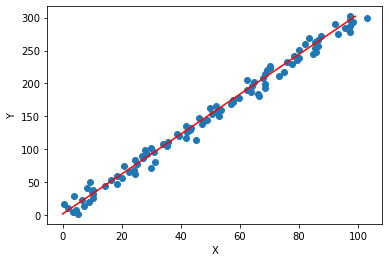

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], Y, )
plt.plot(np.arange(0,100).reshape((100,1)),Y,'r')
plt.xlabel("X")
plt.ylabel("Y")

### 训练模型

&emsp;&emsp;之后，我们依据参数$w$的更新公式来更新模型即可

$$
w:=w-\eta\frac{dL}{dw}
$$

&emsp;&emsp;其中$\frac{dL}{dw}=-2{X}^T(Y-Xw)$。

In [3]:
loss_list = []
W = np.random.random(size=(X.shape[-1], 1))  # 生成随机参数
eta = 0.0000001
for i in range(100):
    dw = -2 * X.T.dot((Y - X.dot(W)))
    W = W - eta * dw
    loss = (Y - X.dot(W)).T.dot(Y - X.dot(W)).reshape(-1)
    # print(loss)
    loss_list.append(loss[0])
print("The paramater of w is: \n", W)

The paramater of w is: 
 [[3.0086111 ]
 [0.21636196]]


### 查看训练结果

&emsp;&emsp;可视化查看Loss和预测结果

Text(0, 0.5, 'loss')

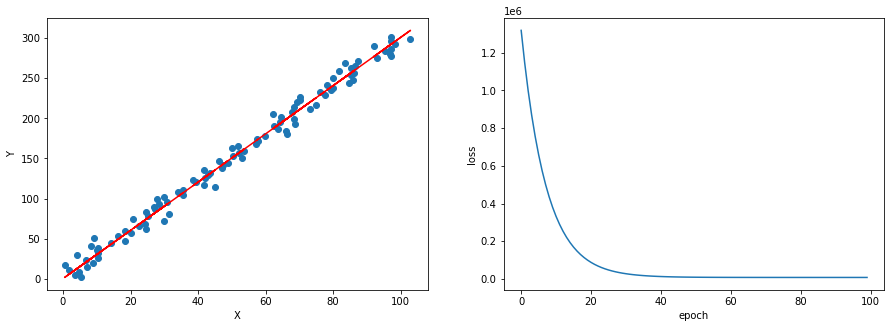

In [4]:
# 可视化
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(X[:, 0], Y)
plt.plot(X[:, 0], X.dot(W), 'r')
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(122)
plt.plot(list(range(0, len(loss_list))), loss_list)
plt.xlabel("epoch")
plt.ylabel("loss")

### 直接求闭式解

&emsp;&emsp;而对$\min L(w)$的求解很明显是一个凸问题（海瑟矩阵$X^TX$正定），我们可以直接通过求解$\frac{dL}{dw}=0$得到$\hat{w}^*$，梯度推导如下：  

$$
\frac{dL}{dw}=-2\sum_{i=1}^m(y_i-w^TX_i)X_i=-2{X}^T(Y-Xw)\\
$$  

&emsp;&emsp;令$\frac{dL}{dw}=0$，可得：$\hat{w}^*=({X}^TX)^{-1}{X}^TY$，实际情景中数据不一定能满足${X}^TX$是满秩（比如$m<n$的情况下，$w$的解有无数种），所以没法直接求逆，我们可以考虑用如下的方式求解：

$$
{X}^+=\lim_{\alpha\rightarrow0}({X}^TX^*+\alpha I)^{-1}{X}^T
$$  

&emsp;&emsp;上面的公式即是Moore-Penrose伪逆的定义，但实际求解更多是通过SVD的方式：  

$$
{X}^+=VD^+U^T
$$  

&emsp;&emsp;其中，$U,D,V$是矩阵$X$做奇异值分解（`SVD`）后得到的矩阵，对角矩阵$D$的伪逆$D^+$由其非零元素取倒数之后再转置得到，通过伪逆求解到的结果有如下优点：  

1. 当$w$有解时，$\hat{w}^*={X}^+Y$是所有解中欧几里得距离$||w||_2$最小的一个；    

2. 当$w$无解时，通过伪逆得到的$\hat{w}^*$是使得$X\hat{w}^*$与$Y$的欧几里得距离$||X\hat{w}^*-Y||_2$最小  

&emsp;&emsp;所以我们需要直接对：$\hat{w}^*=({X}^TX)^{-1}{X}^TY$进行求解，又因为$({X}^TX)^{-1}{X}^T X = I$，所以$({X}^TX)^{-1}{X}^T$可以表示为$X$的伪逆，直接调用np.linalg.pinv(X)就可以将伪逆求解出来：

In [5]:
W_dir = np.linalg.pinv(X).dot(Y)
W_dir

array([[2.97015983],
       [2.93375294]])

## 问题讨论

&emsp;&emsp;在上面的梯度下降的例子中存在一个问题，$w_1$基本能收敛到3附近，而$w_2$却基本在`0`附近，很难收敛到`2`，说明$w_1$比$w_2$更容易收敛($w=[w_1,w_2]^T$)，这很容易理解，模型可以写作：$f(x)=x \cdot w_1+1\cdot w_2$，如果$x$量纲比1大很多，为了使$f(x)$变化，只需更新少量的$w_1$就能达到目的，而$w_2$的更新动力略显不足；可以考虑用如下方式：  

1. 对输入$X$进行归一化，使得$x$无量纲，$w_1,w_2$的更新动力一样（后面封装代码时添加上）。

2. 梯度更新时，$w_1,w_2$使用了一样的学习率，可以让$w_1,w_2$使用不一样的学习率进行更新，比如对$w_2$使用更大的学习率进行更新（可以利用学习率自适应一类的梯度下降法，比如adam）。


## 封装与测试

&emsp;&emsp;接下来简单封装线性回归模型便于后续使用:

In [6]:
class LinearRegression(object):
    def __init__(self, fit_intercept=True, solver='sgd', if_standard=True, epochs=10, eta=1e-2, batch_size=1):
        """
        :param fit_intercept: 是否训练bias
        :param solver:
        :param if_standard:
        """
        self.w = None  # 初始化w的参数。
        self.fit_intercept = fit_intercept
        self.solver = solver  # 是否直接求闭式解。
        self.if_standard = if_standard  # 是否标准化
        if if_standard:
            self.feature_mean = None
            self.feature_std = None
        self.epochs = epochs
        self.eta = eta  # 设置eta参数
        self.batch_size = batch_size

    def init_params(self, n_features):
        """
        初始化参数
        :return:
        """
        self.w = np.random.random(size=(n_features, 1))

    def _fit_closed_form_solution(self, x, y):
        """
        直接求闭式解
        :param x:
        :param y:
        :return:
        """
        self.w = np.linalg.pinv(x).dot(y)

    def _fit_sgd(self, x, y):
        """
        随机梯度下降求解
        :param x:
        :param y:
        :param epochs:
        :param eta:
        :param batch_size:
        :return:
        """
        x_y = np.c_[x, y]
        # 按batch_size更新w,b
        for _ in range(self.epochs):
            np.random.shuffle(x_y)
            for index in range(x_y.shape[0] // self.batch_size):
                batch_x_y = x_y[self.batch_size*index : self.batch_size*(index + 1)]
                batch_x = batch_x_y[:, :-1]
                batch_y = batch_x_y[:, -1:]

                dw = -2 * batch_x.T.dot(batch_y - batch_x.dot(self.w)) / self.batch_size
                self.w = self.w - self.eta * dw

    def fit(self, x, y):
        # 是否归一化feature
        if self.if_standard:
            self.feature_mean = np.mean(x, axis=0)
            self.feature_std = np.std(x, axis=0) + 1e-8
            x = (x - self.feature_mean) / self.feature_std
        # 是否训练bias
        if self.fit_intercept:
            x = np.c_[x, np.ones_like(y)]
        # 初始化参数
        self.init_params(x.shape[1])
        # 训练模型
        if self.solver == 'closed_form':
            self._fit_closed_form_solution(x, y)
        elif self.solver == 'sgd':
            self._fit_sgd(x, y)

    def get_params(self):
        """
        输出原始的系数
        :return: w,b
        """
        if self.fit_intercept:
            w = self.w[:-1]
            b = self.w[-1]
        else:
            w = self.w
            b = 0
        if self.if_standard:
            w = w / self.feature_std.reshape(-1, 1)
            b = b - w.T.dot(self.feature_mean.reshape(-1, 1))
        return w.reshape(-1), b

    def predict(self, x):
        """
        :param x:ndarray格式数据: m x n
        :return: m x 1
        """
        if self.if_standard:
            x = (x - self.feature_mean) / self.feature_std
        if self.fit_intercept:
            x = np.c_[x, np.ones(shape=x.shape[0])]
        return x.dot(self.w)

    def plot_fit_boundary(self, x, y):
        """
        绘制拟合结果
        :param x:
        :param y:
        :return:
        """
        plt.scatter(x[:, 0], y)
        plt.plot(x[:, 0], self.predict(x), 'r')

### 测试封装后的类

#### 测试训练模型
&emsp;&emsp;输入数据，测试训练模型：

In [7]:
lr=LinearRegression(solver='sgd')  # 实例化一个线性回归类。
lr.fit(X[:,:-1], Y)  # 输入数据，让模型拟合。
predict=lr.predict(X[:,:-1])  # 查看预测结果
print('w',lr.get_params())  #查看w
np.std(Y - predict)  #查看标准差

w (array([2.98285721]), array([[2.92996314]]))


9.016925569327965

&emsp;&emsp;可视化结果：

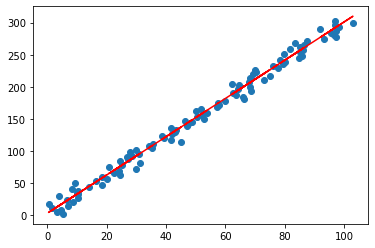

In [8]:
lr.plot_fit_boundary(X[:,:-1],Y)

#### 测试闭式解求解

In [9]:
lr=LinearRegression(solver='closed_form')
lr.fit(X[:,:-1],Y)
predict=lr.predict(X[:,:-1])
print('w',lr.get_params())
np.std(Y-predict)

w (array([2.97015983]), array([[2.93375294]]))


9.009250519971642

&emsp;&emsp;可视化结果：

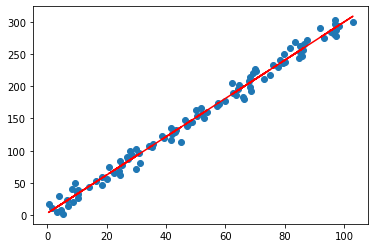

In [10]:
lr.plot_fit_boundary(X[:,:-1],Y)

## 过拟合

&emsp;&emsp;建模的目的是让模型学习到数据的一般性规律，但有时候可能会学过头，学到一些噪声数据的特性，虽然模型可以在训练集上取得好的表现，但在测试集上结果往往会变差，这时称模型陷入了过拟合，之前的效果看起来还可以，但如果加入几个异常点，再看看效果呢

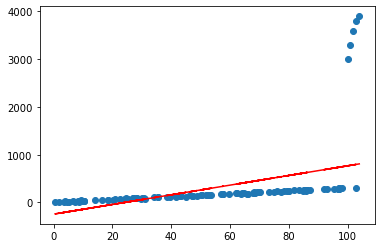

In [11]:
X=np.concatenate([X, np.asanyarray([[100,1],[101,1],[102,1],[103,1],[104,1]])])
Y=np.concatenate([Y, np.asanyarray([[3000],[3300],[3600],[3800],[3900]])])
lr=LinearRegression()  # 默认求解器SGD
lr.fit(X[:,:-1], Y)
lr.plot_fit_boundary(X[:,:-1],Y)

## 正则化

&emsp;&emsp;可以看到，仅仅加入了几个很离谱的异常点，就会对预测产生很大的影响，且偏离很远，这在实际情况中是很常见的；通常可以通过对模型参数添加正则化约束来避免这种情况，使其不会太“飘”，做法是在`loss`函数中为权重$w$添加$L_1$或者$L_2$约束，借用上一节的公式推导，直接推出`loss`部分：  

1.线性回归中添加$L_1$约束称为`Lasso`回归，其损失函数如下：  

$$
L(w)=\sum_{i=1}^m(y_i-f(x_i))^2+\lambda||w||_1
$$  

2.线性回归中添加$L_2$约束称为`Ridge`回归，其损失函数如下：  

$$
L(w)=\sum_{i=1}^m(y_i-f(x_i))^2+\alpha||w||_2
$$ 

3.如果不太确定用$L_1$好，还是$L_2$好，可以用它们的组合，称作`ElasticNet`，损失函数如下：  

$$
L(w)=\sum_{i=1}^m(y_i-f(x_i))^2+\lambda||w||_1+\alpha||w||_2
$$ 

&emsp;&emsp;可以发现通过调整超参，可以控制$w$的大小，如果$\lambda$或$\alpha$设置很大，$w$会被约束的很小，而如果$\alpha$或$\lambda$设置为`0`，等价于原始的不带正则项的线性回归；通常可以通过交叉验证，根据验证集上的表现来设置一个合适的超参；接下来在上一节线性回归代码的基础上实现`Lasso`, `Ridge`, `ElasticNet`模型，另外设置两个参数`l1_ratio`以及`l2_ratio`，分别用来控制$L_1$和$L_2$的`loss`部分的权重


### 带正则化的封装与测试

&emsp;&emsp;首先定义一个符号函数：

In [12]:
def sign(x):
    """
    符号函数
    :param x:
    :return:
    """
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [13]:
class LinearRegression(object):
    def __init__(self, fit_intercept=True, solver='sgd', if_standard=True, epochs=10, eta=1e-2, batch_size=1,
                 l1_ratio=None, l2_ratio=None):
        """
        :param fit_intercept: 是否训练bias
        :param solver:
        :param if_standard:
        """
        self.w = None
        self.fit_intercept = fit_intercept
        self.solver = solver
        self.if_standard = if_standard
        if if_standard:
            self.feature_mean = None
            self.feature_std = None
        self.epochs = epochs
        self.eta = eta
        self.batch_size = batch_size
        self.l1_ratio = l1_ratio
        self.l2_ratio = l2_ratio
        # 注册sign函数
        self.sign_func = np.vectorize(sign)

    def init_params(self, n_features):
        """
        初始化参数
        :return:
        """
        self.w = np.random.random(size=(n_features, 1))

    def _fit_closed_form_solution(self, x, y):
        """
        直接求闭式解
        :param x:
        :param y:
        :return:
        """
        if self.l1_ratio is None and self.l2_ratio is None:  # l1和l2都是None的时候。
            self.w = np.linalg.pinv(x).dot(y)
        elif self.l1_ratio is None and self.l2_ratio is not None:
            self.w = np.linalg.inv(x.T.dot(x) + self.l2_ratio * np.eye(x.shape[1])).dot(x.T).dot(y)
        else:
            self._fit_sgd(x, y)

    def _fit_sgd(self, x, y):
        """
        随机梯度下降求解
        :param x:
        :param y:
        :param epochs:
        :param eta:
        :param batch_size:
        :return:
        """
        x_y = np.c_[x, y]
        # 按batch_size更新w,b
        for _ in range(self.epochs):
            np.random.shuffle(x_y)
            for index in range(x_y.shape[0] // self.batch_size):
                batch_x_y = x_y[self.batch_size * index:self.batch_size * (index + 1)]
                batch_x = batch_x_y[:, :-1]
                batch_y = batch_x_y[:, -1:]

                dw = -2 * batch_x.T.dot(batch_y - batch_x.dot(self.w)) / self.batch_size

                # 添加l1和l2的部分
                dw_reg = np.zeros(shape=(x.shape[1] - 1, 1))
                if self.l1_ratio is not None: # l1的情况
                    dw_reg += self.l1_ratio * self.sign_func(self.w[:-1]) / self.batch_size
                if self.l2_ratio is not None: # l2的情况
                    dw_reg += 2 * self.l2_ratio * self.w[:-1] / self.batch_size
                dw_reg = np.concatenate([dw_reg, np.asarray([[0]])], axis=0)
                dw += dw_reg
                self.w = self.w - self.eta * dw

    def fit(self, x, y):
        # 是否归一化feature
        if self.if_standard:
            self.feature_mean = np.mean(x, axis=0)
            self.feature_std = np.std(x, axis=0) + 1e-8
            x = (x - self.feature_mean) / self.feature_std
        # 是否训练bias
        if self.fit_intercept:
            x = np.c_[x, np.ones_like(y)]
        # 初始化参数
        self.init_params(x.shape[1])
        # 训练模型
        if self.solver == 'closed_form':
            self._fit_closed_form_solution(x, y)
        elif self.solver == 'sgd':
            self._fit_sgd(x, y)

    def get_params(self):
        """
        输出原始的系数
        :return: w,b
        """
        if self.fit_intercept:
            w = self.w[:-1]
            b = self.w[-1]
        else:
            w = self.w
            b = 0
        if self.if_standard:
            w = w / self.feature_std.reshape(-1, 1)
            b = b - w.T.dot(self.feature_mean.reshape(-1, 1))
        return w.reshape(-1), b

    def predict(self, x):
        """
        :param x:ndarray格式数据: m x n
        :return: m x 1
        """
        if self.if_standard:
            x = (x - self.feature_mean) / self.feature_std
        if self.fit_intercept:
            x = np.c_[x, np.ones(shape=x.shape[0])]
        return x.dot(self.w)

    def plot_fit_boundary(self, x, y):
        """
        绘制拟合结果
        :param x:
        :param y:
        :return:
        """
        plt.scatter(x[:, 0], y)
        plt.plot(x[:, 0], self.predict(x), 'r')

### 测试带正则化的类

#### Lasso

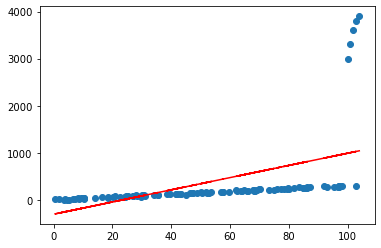

In [14]:
lasso = LinearRegression(l1_ratio=100)
lasso.fit(X[:,:-1], Y)
lasso.plot_fit_boundary(X[:,:-1], Y)

#### Ridge

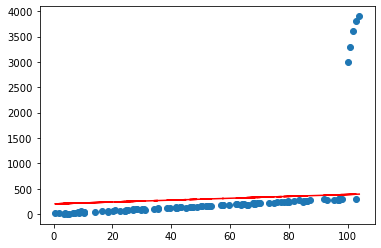

In [15]:
ridge=LinearRegression(l2_ratio=10)
ridge.fit(X[:,:-1],Y)
ridge.plot_fit_boundary(X[:,:-1],Y)

#### ElasticNet

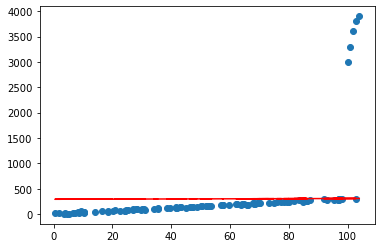

In [16]:
elastic=LinearRegression(l1_ratio=100,l2_ratio=10)
elastic.fit(X[:,:-1],Y)
elastic.plot_fit_boundary(X[:,:-1],Y)

### 与sklearn对比

In [17]:
#与sklearn对比
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X[:,:-1],Y)
predict=lr.predict(X[:,:-1])
#查看w,b
print('w:',lr.coef_,'b:',lr.intercept_)
#查看标准差
np.std(Y-predict)

w: [[11.03519836]] b: [-268.67956952]


642.3286630571652